#### Data Importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#pemanggilan data
data = pd.read_csv("car.data")

In [ ]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Dataset belum memiliki nama kolom. Jadi akan diberikan nama sesuai petunjuk pada link dataset :
https://archive.ics.uci.edu/dataset/19/car+evaluation </br>
yaitu :
"buying", "maint", "doors", "person", "lug_boot", "safety", "class" <br>
Atau dalam bahasa indonesia : </br>
"harga_beli", "biaya_rawat", "pintu", "kap_orang", "kap_barang", "keamanan", "hasil_eval"

In [ ]:
data.columns = ["harga_beli", "biaya_rawat", "pintu", "kap_orang", "kap_barang",
                "keamanan", "hasil_eval"]

In [ ]:
data.tail()

,harga_beli,biaya_rawat,pintu,kap_orang,kap_barang,keamanan,hasil_eval
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


#### Exploratory Data Analysis (EDA)

In [ ]:
# cek statistik deskriptif untul mendapat gambaran umim
data.describe()

,harga_beli,biaya_rawat,pintu,kap_orang,kap_barang,keamanan,hasil_eval
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   harga_beli   1727 non-null   object
 1   biaya_rawat  1727 non-null   object
 2   pintu        1727 non-null   object
 3   kap_orang    1727 non-null   object
 4   kap_barang   1727 non-null   object
 5   keamanan     1727 non-null   object
 6   hasil_eval   1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Dari output di atas, didapat bahwa dataset memiliki 6 fitur dan kebetulan tidak memiliki nilai NULL
<br>
Pada kasus ini, tidak ditemui perbedaan banyak baris per kolom, jadi sepertinya tidak perlu melakukan preprocessing yang kompleks. <br>
Berikut akan dilakukan konversi tipe data dari object(string) menjadi categorical. Ini perlu dilakukan untuk setiap kolom.
<br> <br>


In [ ]:
# konversi tipe data dari string ke kategorik
data['harga_beli'] = data["harga_beli"].astype("category")
data['biaya_rawat'] = data["biaya_rawat"].astype("category")
data['pintu'] = data["pintu"].astype("category")
data['kap_orang'] = data["kap_orang"].astype("category")
data['kap_barang'] = data["kap_barang"].astype("category")
data['keamanan'] = data["keamanan"].astype("category")
data['hasil_eval'] = data["hasil_eval"].astype("category")

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   harga_beli   1727 non-null   category
 1   biaya_rawat  1727 non-null   category
 2   pintu        1727 non-null   category
 3   kap_orang    1727 non-null   category
 4   kap_barang   1727 non-null   category
 5   keamanan     1727 non-null   category
 6   hasil_eval   1727 non-null   category
dtypes: category(7)
memory usage: 13.1 KB


Didapat dataset yang siap dioperasikan secara kategorik.

In [ ]:
with pd.option_context('display.max_colwidth', None):
  display(data)

,harga_beli,biaya_rawat,pintu,kap_orang,kap_barang,keamanan,hasil_eval
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


Berdasarkan dataset, dapat disimpulkan bahwa semua variabel memiliki sifat ordinal :
<br>
1. Harga beli berisi nilai dari low hingga v.high. <br>
2. Biaya rawat berisi nilai dari low hingga v.high <br>
3. Pintu berisi nilai dari 2 hingga 5more(>=5) <br>
4. Kapasitas orang berisi nilai dari 2 hingga more (>=5) <br>
5. Kapasitas barang berisi nilai dari small hingga big <br>
6. Keamanan berisi nilai low hingga high <br>
7. Hasil_eval berisi nilai unacc(unacceptable) hingga v.good <br>


Dari analisis di atas, dapat disimpulkan memang keenam variabel independen merupakan variabel kategorik ordinal. <br>
Oleh karena itu, dataset ini dapat dilakukan reduksi dimensi jika diperlukan.

#### Data Preprocessing

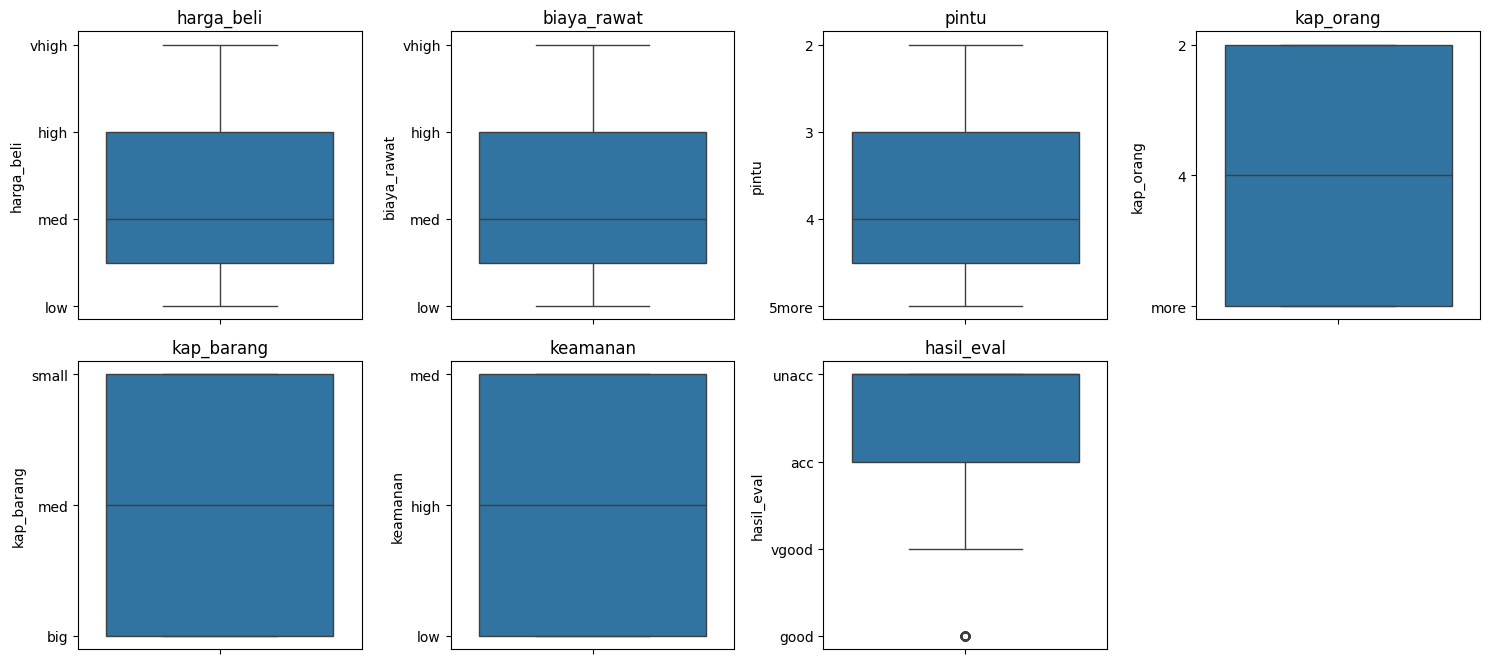

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = data.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Karena memang dataset hanya terdiri atas variabel kategorik, kemungkinan munculnya outlier cukup kecil. Tetapi memang ada sedikit pada variabel hasil_eval(variabel target). <br>

Sebelum dataset diproses lebih lanjut, perlu diperhatikan bahwa urutan pada kategori ini belum benar. Seperti pada kategori keamanan, med justru paling atas, baru diikuti high dan low. <br>

Oleh karena itu, diperlukan perurutan ulang.

In [ ]:
data2 = data

kat_harga_beli = ["low", "med", "high", "vhigh"]
kat_biaya_rawat = ["low", "med", "high", "vhigh"]
kat_pintu = ["2", "3", "4", "5more"]
kat_kap_orang = ["2", "4", "more"]
kat_kap_barang = ["small", "med", "big"]
kat_keamanan = ["low", "med", "high"]
kat_hasil_eval = ["unacc", "acc", "good", "vgood"]

data2["harga_beli"] = data2["harga_beli"].cat.reorder_categories(kat_harga_beli,
                                                                 ordered = True)
data2["biaya_rawat"] = data2["biaya_rawat"].cat.reorder_categories(kat_biaya_rawat,
                                                                   ordered = True)
data2["pintu"] = data2["pintu"].cat.reorder_categories(kat_pintu,
                                                       ordered = True)
data2["kap_orang"] = data2["kap_orang"].cat.reorder_categories(kat_kap_orang,
                                                               ordered = True)
data2["kap_barang"] = data2["kap_barang"].cat.reorder_categories(kat_kap_barang,
                                                                 ordered = True)
data2["keamanan"] = data2["keamanan"].cat.reorder_categories(kat_keamanan,
                                                             ordered = True)
data2["hasil_eval"] = data2["hasil_eval"].cat.reorder_categories(kat_hasil_eval,
                                                                 ordered = True)

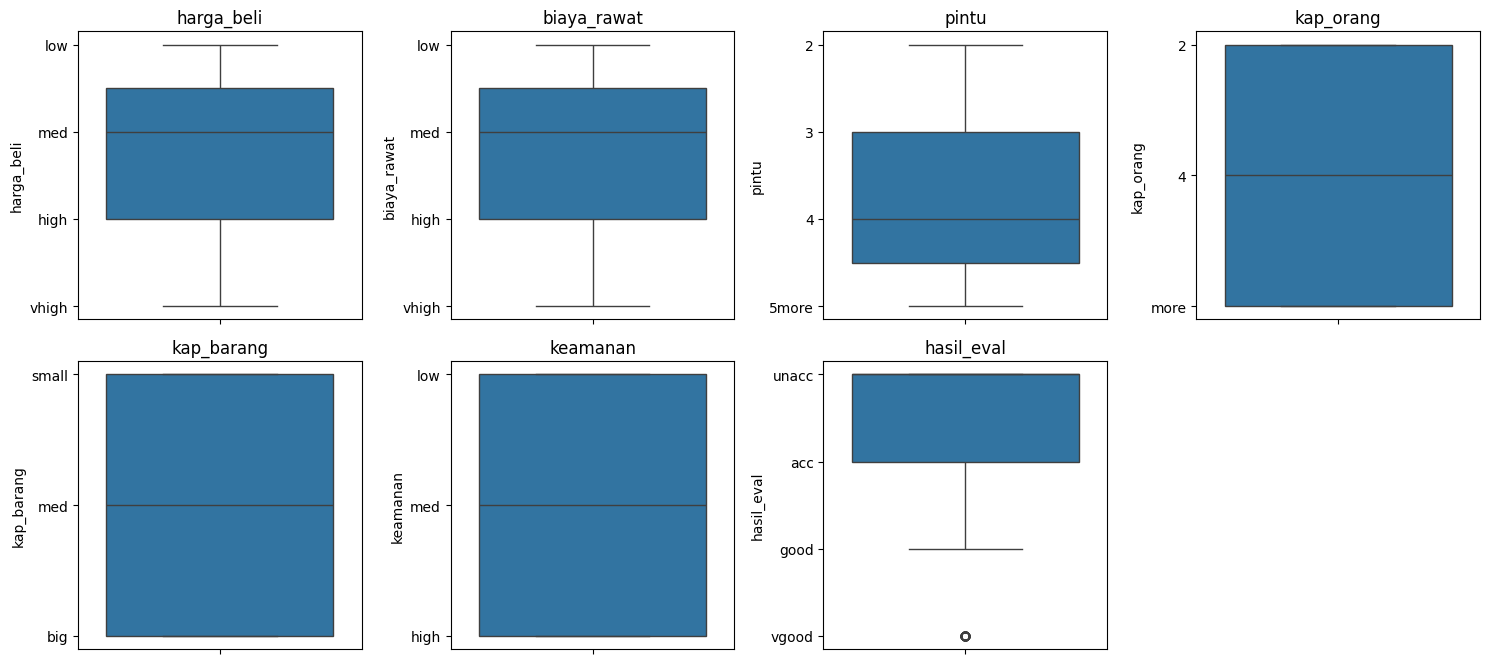

In [ ]:
num_cols = data.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
with pd.option_context('display.max_colwidth', None):
  display(data2)

,harga_beli,biaya_rawat,pintu,kap_orang,kap_barang,keamanan,hasil_eval
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


Data